In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [22]:
data=pd.read_excel(r"C:\Users\mohan\Desktop\EXCEL r assignment\Forecasting\CocaCola_Sales_Rawdata.xlsx" ,index_col=[0],parse_dates=True,squeeze=True)
data.head()

Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Name: Sales, dtype: float64

In [46]:
data.columns

Index(['Quarter', 'Sales'], dtype='object')

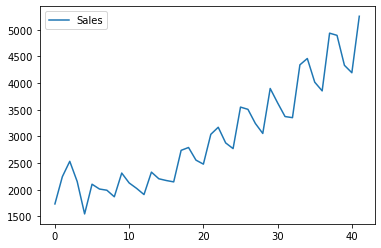

In [40]:
data.plot()
plt.show()

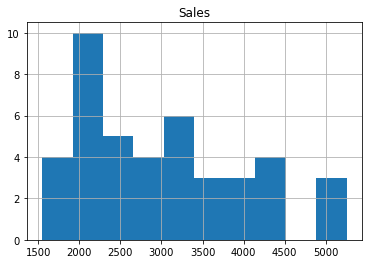

In [41]:
data.hist()
plt.show()

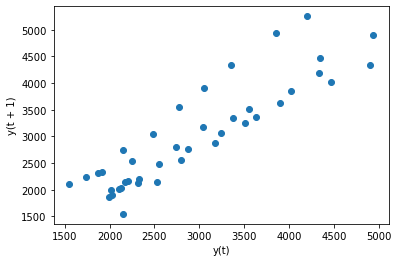

In [44]:
from pandas.plotting import lag_plot
lag_plot(data)
plt.show()

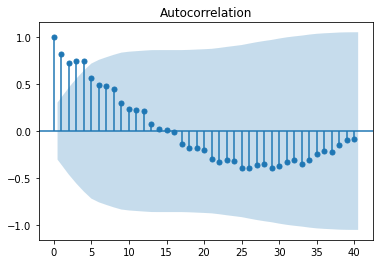

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data,lags=40)
plt.show()

<AxesSubplot:>

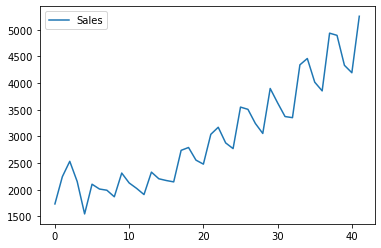

In [5]:
#Naive Forecast
data.plot()


In [6]:
# it can be infered from above that the plot is not regular so we have to smooth the data

In [7]:
data_ma=data.rolling(window=10).mean()

<AxesSubplot:>

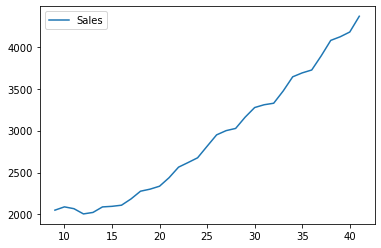

In [8]:
data_ma.plot()

In [9]:
# it is considerably smoothen

In [10]:
data_base=pd.concat([data,data["Sales"].shift(1)],axis=1)

In [12]:
data_base.head()

,Quarter,Sales,Sales
0,Q1_86,1734.827000,NaN
1,Q2_86,2244.960999,1734.827000
2,Q3_86,2533.804993,2244.960999
3,Q4_86,2154.962997,2533.804993
4,Q1_87,1547.818996,2154.962997


In [13]:
data_base.columns 

Index(['Quarter', 'Sales', 'Sales'], dtype='object')

In [14]:
data_base.columns = ['Quarter', 'Actual_Sales', 'Forecast_Sales']

In [15]:
data_base.dropna(inplace=True)

In [16]:
data_base.head()

,Quarter,Actual_Sales,Forecast_Sales
1,Q2_86,2244.960999,1734.827000
2,Q3_86,2533.804993,2244.960999
3,Q4_86,2154.962997,2533.804993
4,Q1_87,1547.818996,2154.962997
5,Q2_87,2104.411995,1547.818996


In [17]:
from sklearn.metrics import mean_squared_error
Naive_error=mean_squared_error(data_base.Actual_Sales,data_base.Forecast_Sales)

In [18]:
Naive_error

192405.72009698782

In [19]:
np.sqrt(Naive_error)# error for Naive forecast

438.64076429008264

In [20]:
# ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

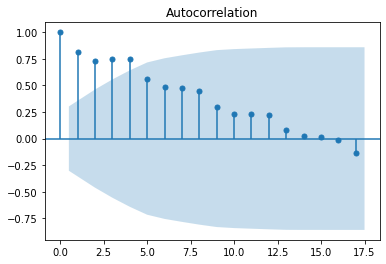

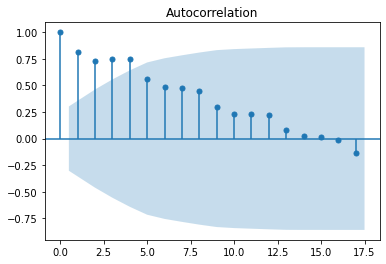

In [23]:
plot_acf(data)

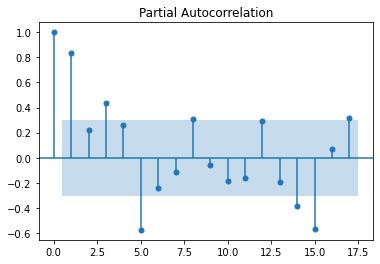

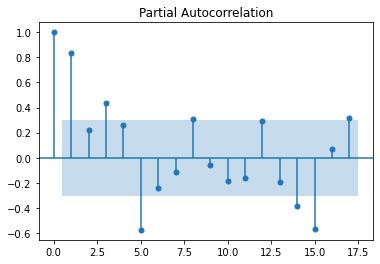

In [24]:
plot_pacf(data)

In [25]:
data.shape

(42,)

In [26]:
#q=5 p=3 d=0-2
from statsmodels.tsa.arima_model import ARIMA
data_train=data[0:30]
data_test=data[30:43]

In [33]:
model=ARIMA(data_train,order=(4,1,2))

C:\Users\mohan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\mohan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

In [34]:
model_fit=model.fit()

C:\Users\mohan\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\mohan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mohan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import

In [35]:
model_fit.aic # lesser the value bad is the model

429.0968811417142

In [36]:
data_forecast=model_fit.forecast(steps=12)[0]

In [37]:
np.sqrt(mean_squared_error(data_test,data_forecast))

381.38629799056366

In [51]:
# as we can see Arima model  is better than Naive forecast  method as rmse value is less 
rmse["rmse"]=pd.DataFrame([np.sqrt(mean_squared_error(data_test,data_forecast)),np.sqrt(Naive_error)])

In [53]:
rmse.drop(rmse.columns[0], axis=1)

,rmse
0,381.386298
1,438.640764


In [54]:
# predicted value for ARIMA
data_forecast

array([3985.62720464, 3659.29668613, 3850.87322478, 4160.12503072,
       4151.45369386, 4147.03264857, 4320.83670167, 4452.64782648,
       4493.38609354, 4577.97765847, 4704.17822743, 4796.40225217])